# Import GitHub Repo

In [ ]:
!git clone https://github.com/ai4ai-lab/Factored-Action-Spaces-for-OPE.git

Cloning into 'Factored-Action-Spaces-for-OPE'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 93 (delta 20), reused 71 (delta 7), pack-reused 0
Receiving objects: 100% (93/93), 2.94 MiB | 24.12 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
#Enable importing code from parent directory
import os, sys
main_folder = os.path.abspath('./Factored-Action-Spaces-for-OPE')
sys.path.insert(1, main_folder)
#Change our working directory
if os.getcwd() == '/content':
  os.chdir('./Factored-Action-Spaces-for-OPE')

# Setup Functions

In [ ]:
def PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers):
  #Calculate policy divergence from Voloshin et al.
  D = 0
  for state in state_action_map.keys():
      state_no = state_numbers[state]
      for action in state_action_map[state]:
          action_no = action_numbers[action]
          difference = pi_e[state_no, action_no]/pi_b[state_no, action_no]
          D = max(D, difference)
  return D

In [ ]:
from scipy.special import rel_entr

def MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers):
  #Calculate policy divergence from Voloshin et al.
  D = 0
  for state in state_action_map.keys():
      state_no = state_numbers[state]
      difference = sum(rel_entr(pi_e[state_no, :], pi_b[state_no, :]))
      D = max(D, difference)
  return D

# 1-step-MDP

## Main Policy Divergence 1.44

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 1.44
Space 1: 1.2
Space 2: 1.2


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 0.04027102710137771
Space 1: 0.020135513550688863
Space 2: 0.020135513550688863


## Main Policy Divergence 2.56

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/1-step-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['state', 'up,right', 0.64],
             ['state', 'up,left', 0.16],
             ['state', 'down,right', 0.16],
             ['state', 'down,left', 0.04]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['state', 'right', 0.8],
                   ['state', 'left', 0.2]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['state', 'up', 0.8],
                 ['state', 'down', 0.2]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 2.56
Space 1: 1.6
Space 2: 1.6


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 0.38548951404351484
Space 1: 0.19274475702175753
Space 2: 0.19274475702175753


## Main Policy Divergence 3.61

Restart runtime before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH = 'configs/1-step-MDP/evaluation-policy.csv'

HORIZONTAL_REWARD_PATH = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'

VERTICAL_REWARD_PATH = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write everything
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 3.61
Space 1: 1.9
Space 2: 1.9


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 0.9892638744281455
Space 1: 0.4946319372140727
Space 2: 0.4946319372140727


## Main Policy Divergence 4.46

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.2025],
             ['state', 'up,left', 0.2475],
             ['state', 'down,right', 0.2475],
             ['state', 'down,left', 0.3025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.45],
                   ['state', 'left', 0.55]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.45],
                 ['state', 'down', 0.55]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 4.4567901234567895
Space 1: 2.111111111111111
Space 2: 2.111111111111111


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 1.1799178361975828
Space 1: 0.5899589180987915
Space 2: 0.5899589180987915


## Main Policy Divergence 5.64

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.16],
             ['state', 'up,left', 0.24],
             ['state', 'down,right', 0.24],
             ['state', 'down,left', 0.36]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.4],
                   ['state', 'left', 0.6]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.4],
                 ['state', 'down', 0.6]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 5.640625
Space 1: 2.3749999999999996
Space 2: 2.3749999999999996


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 1.3950044662457486
Space 1: 0.697502233122874
Space 2: 0.697502233122874


## Main Policy Divergence 10.03

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.09],
             ['state', 'up,left', 0.21],
             ['state', 'down,right', 0.21],
             ['state', 'down,left', 0.49]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.3],
                   ['state', 'left', 0.7]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.3],
                 ['state', 'down', 0.7]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 10.027777777777779
Space 1: 3.1666666666666665
Space 2: 3.1666666666666665


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 1.9261853359214065
Space 1: 0.963092667960703
Space 2: 0.963092667960703


## Main Policy Divergence 22.56

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.04],
             ['state', 'up,left', 0.16],
             ['state', 'down,right', 0.16],
             ['state', 'down,left', 0.64]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.2],
                   ['state', 'left', 0.8]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.2],
                 ['state', 'down', 0.8]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 22.5625
Space 1: 4.749999999999999
Space 2: 4.749999999999999


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 2.6832159020644664
Space 1: 1.341607951032233
Space 2: 1.341607951032233


## Main Policy Divergence 90.25

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.01],
             ['state', 'up,left', 0.09],
             ['state', 'down,right', 0.09],
             ['state', 'down,left', 0.81]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.1],
                   ['state', 'left', 0.9]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.1],
                 ['state', 'down', 0.9]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 90.25
Space 1: 9.499999999999998
Space 2: 9.499999999999998


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 3.9884172415627255
Space 1: 1.9942086207813616
Space 2: 1.9942086207813616


## Main Policy Divergence 361.0

Restart environment before running

In [ ]:
import pandas as pd

# Set up global information
MAIN_REWARD_PATH_B = 'configs/1-step-MDP/behaviour-policy.csv'
HORIZONTAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/horizontal/behaviour-policy.csv'
VERTICAL_REWARD_PATH_B = 'configs/1-step-MDP/factorisation/vertical/behaviour-policy.csv'

MAIN_REWARD_PATH_E = 'configs/1-step-MDP/evaluation-policy.csv'
HORIZONTAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/horizontal/evaluation-policy.csv'
VERTICAL_REWARD_PATH_E = 'configs/1-step-MDP/factorisation/vertical/evaluation-policy.csv'

# Modify and write evaluation policy
main_data = [['state', 'up,right', 0.9025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.0025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_E)

horizontal_data = [['state', 'right', 0.95],
                   ['state', 'left', 0.05]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_E)

vertical_data = [['state', 'up', 0.95],
                 ['state', 'down', 0.05]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_E)

# Modify and write behaviour policy
main_data = [['state', 'up,right', 0.0025],
             ['state', 'up,left', 0.0475],
             ['state', 'down,right', 0.0475],
             ['state', 'down,left', 0.9025]]

main_reward_df = pd.DataFrame(main_data, columns=['state', 'action', 'probability'])
main_reward_df.to_csv(MAIN_REWARD_PATH_B)

horizontal_data = [['state', 'right', 0.05],
                   ['state', 'left', 0.95]]
horizontal_reward_df = pd.DataFrame(horizontal_data, columns=['state', 'action', 'probability'])
horizontal_reward_df.to_csv(HORIZONTAL_REWARD_PATH_B)

vertical_data = [['state', 'up', 0.05],
                 ['state', 'down', 0.95]]
vertical_reward_df = pd.DataFrame(vertical_data, columns=['state', 'action', 'probability'])
vertical_reward_df.to_csv(VERTICAL_REWARD_PATH_B)

In [ ]:
import sys
sys.argv[1] = '1-step-MDP'
import numpy as np
import policy_estimators as pe
from load_discrete_MDP import state_action_map, pi_b, pi_e
from load_discrete_MDP import factored_behaviour_policies, factored_evaluation_policies, factored_state_action_maps
from load_discrete_MDP import state_numbers, action_numbers, factored_state_numbers, factored_action_numbers
import gc

In [ ]:
print('POLICY DIVERGENCE')
print(f'Top Level: {PD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {PD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {PD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

POLICY DIVERGENCE
Top Level: 361.0
Space 1: 18.999999999999996
Space 2: 18.999999999999996


In [ ]:
print('MAXIMUM POLICY DISTANCE')
print(f'Top Level: {MPD(pi_e, pi_b, state_action_map, state_numbers, action_numbers)}')
print(f'Space 1: {MPD(factored_evaluation_policies[0], factored_behaviour_policies[0], factored_state_action_maps[0], factored_state_numbers[0], factored_action_numbers[0])}')
print(f'Space 2: {MPD(factored_evaluation_policies[1], factored_behaviour_policies[1], factored_state_action_maps[1], factored_state_numbers[1], factored_action_numbers[1])}')

MAXIMUM POLICY DISTANCE
Top Level: 5.299990162499593
Space 1: 2.649995081249796
Space 2: 2.649995081249796


## Plot Graphs
<a id='vs_pd_ep_1e3_1e5'></a>
<a name="vs_pd_ep_1e3_1e5"></a>

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(label, extralabel, low_ylim, up_ylim):
  PDS = [1.44, 2.56, 3.61, 4.4567901234567895, 5.640625, 10.027777777777779, 22.5265, 90.25, 361.0]
  MPDS = [0.04027102710137771, 0.38548951404351484, 0.9892638744281455, 1.1799178361975828, 1.3950044662457486, 1.9261853359214065, 2.6832159020644664, 3.9884172415627255, 5.299990162499593]

  PDS_1 = [1.2, 1.6, 1.9, 2.111111111111111, 2.3749999999999996, 3.1666666666666665, 4.749999999999999, 9.499999999999998, 18.999999999999996]
  MPDS_1 = [0.020135513550688863, 0.19274475702175753, 0.4946319372140727, 0.5899589180987915, 0.697502233122874, 0.963092667960703, 1.341607951032233, 1.9942086207813616, 2.649995081249796]

  ylabels = {
      'PD': 'PD Between Policies',
      'MPD': 'MPD Between Policies',
  }

  xlabels = {
      'PD': 'PD Between Non-factored Policies',
      'MPD': 'MPD Between Non-factored Policies',
  }

  legend_list = ['Non-factored space', 'Factored space 1 or 2']

  x = PDS
  y1 = PDS
  y2 = PDS_1
  if label == 'MPD':
    x = MPDS
    y1 = MPDS
    y2 = MPDS_1

  plt.figure()
  plt.plot(x, y1)
  plt.plot(x, y2)
  plt.grid(visible=True, which='both', axis='both')
  plt.legend(legend_list)
  plt.xlabel(xlabels[label])
  plt.ylabel(ylabels[label])
  plt.xlim([0, up_ylim])
  plt.ylim([low_ylim, up_ylim])
  plt.savefig(f'{label}-{extralabel}.pdf', dpi=300)
  plt.show()

#### PDS

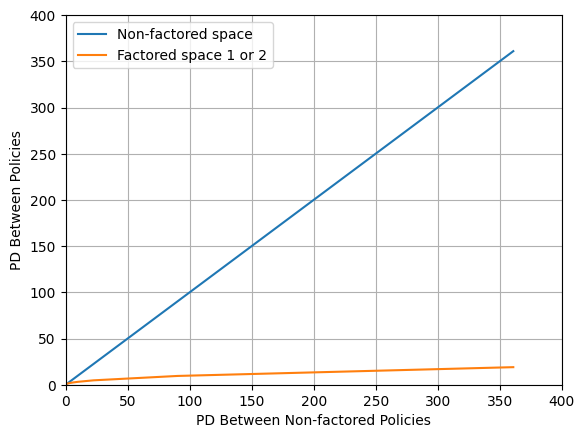

In [ ]:
plot_graphs('PD', '1-step-MDP', 0, 400)

#### MPD

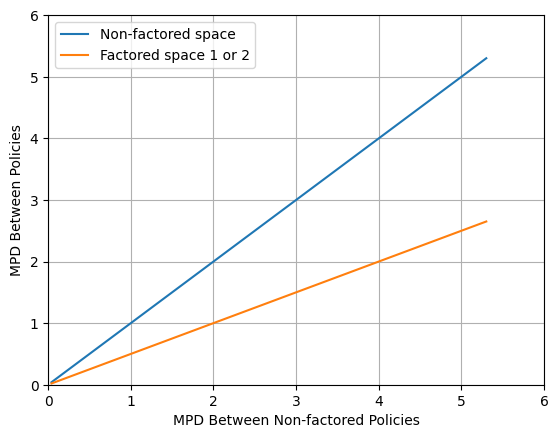

In [ ]:
plot_graphs('MPD', '1-step-MDP', 0, 6.0)